# Tarea Taller de Visualización de Series de tiempo

### Gabriel Sebastián Del Carpio Cuenca

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!pip install yfinance
import yfinance as yf

In [4]:
tickers = ["AAPL", "NOK", "AMZN", "XOM"]
finance = yf.download(tickers, start="2011-01-01", end="2021-12-31")  # Descarga los datos de los tickers específicos en el rango de fechas indicado

[*********************100%%**********************]  4 of 4 completed


In [5]:
finance = finance['Close']

In [6]:
finance

,AAPL,AMZN,NOK,XOM
Date,,,,
2011-01-03,11.770357,9.211000,10.66,74.550003
2011-01-04,11.831786,9.250500,10.86,74.900002
2011-01-05,11.928571,9.371000,10.66,74.699997
2011-01-06,11.918929,9.293000,10.59,75.180000
2011-01-07,12.004286,9.274500,10.51,75.589996
...,...,...,...,...
2021-12-23,176.279999,171.068497,6.19,61.020000
2021-12-27,180.330002,169.669495,6.34,61.889999
2021-12-28,179.289993,170.660995,6.30,61.689999


In [15]:
finance.index

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14',
               ...
               '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', name='Date', length=2768, freq=None)

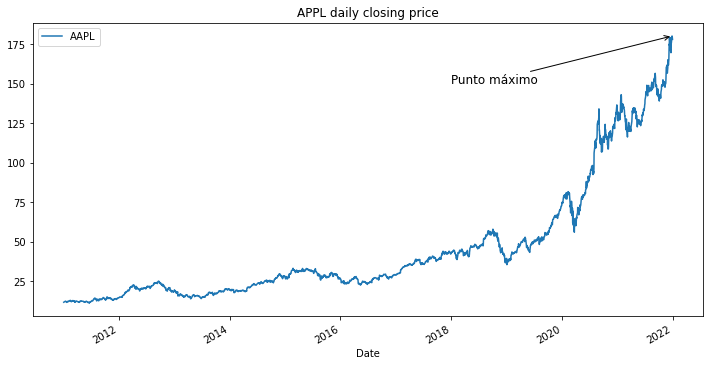

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))
finance.plot(y='AAPL', ax=ax)
ax.set_title('APPL daily closing price')

max_point = finance['AAPL'].idxmax()
max_value = finance['AAPL'].max()

ax.annotate('Punto máximo', xy=(max_point, max_value), xytext=('2018-01-01', 150),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=12, color='black')

plt.show()

In [16]:
def graficar_seriesdetiempo(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color = color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color = color)
    axes.tick_params(axis = 'y', colors=)

Text(0.5, 1.05, 'Precios de acciones de algunas empresas')

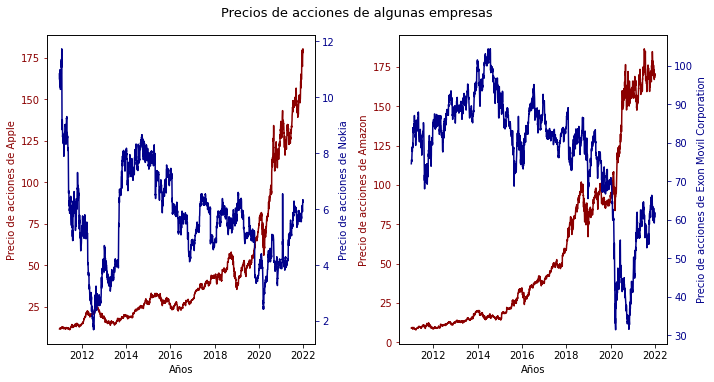

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
graficar_seriesdetiempo(axs[0], finance.index.to_numpy(), finance['AAPL'].values, 'darkred', 'Años', 'Precio de acciones de Apple')
ax1 = axs[0].twinx()
graficar_seriesdetiempo(ax1, finance.index.to_numpy(), finance['NOK'].values, 'darkblue', 'Años', 'Precio de acciones de Nokia')

graficar_seriesdetiempo(axs[1], finance.index.to_numpy(), finance['AMZN'].values, 'darkred', 'Años', 'Precio de acciones de Amazon')
ax2 = axs[1].twinx()
graficar_seriesdetiempo(ax2, finance.index.to_numpy(), finance['XOM'].values, 'darkblue', 'Años', 'Precio de acciones de Exon Movil Corporation')

fig.tight_layout(pad=1.0) #distancia de 1.0 entre los ejes
fig.suptitle('Precios de acciones de algunas empresas', y=1.05 , fontsize=13)

In [19]:
finance.describe()

,AAPL,AMZN,NOK,XOM
count,2768.000000,2768.000000,2768.000000,2768.000000
mean,45.716462,57.511743,5.619830,78.269133
std,38.281633,52.382961,1.611821,15.154629
min,11.261429,8.048500,1.690000,31.450001
25%,20.457232,14.991125,4.417500,73.230003
50%,29.815000,36.393749,5.615000,82.014999
75%,51.013751,89.321249,6.550000,87.742498
max,180.330002,186.570496,11.730000,104.379997


In [36]:
def graficar_seriesdetiempo_max(axes, x, y, color, xlabel, ylabel, max_date, max_val, maxdate, maxval):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)
    axes.tick_params(axis='y', colors=color)
    axes.annotate('Punto Máximo', xy=(pd.to_datetime(max_date), max_val),
                  xytext=(pd.to_datetime(maxdate), maxval), fontsize=12,
                  color='black', arrowprops=dict(arrowstyle='->', color='blue'))

Text(0.5, 1.05, 'Precios de acciones de algunas empresas')

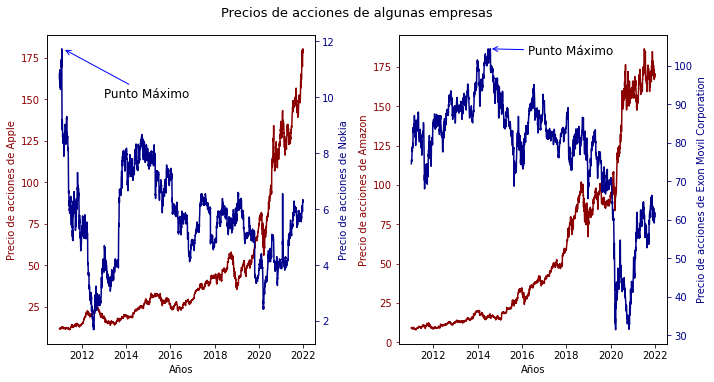

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
graficar_seriesdetiempo(axs[0], finance.index.to_numpy(), finance['AAPL'].values, 'darkred', 'Años', 'Precio de acciones de Apple')
ax1 = axs[0].twinx()
graficar_seriesdetiempo_max(ax1, finance.index.to_numpy(), finance['NOK'].values, 'darkblue', 'Años', 
                            'Precio de acciones de Nokia', '2011-03-05', 11.73,'2013-01-01',10)

graficar_seriesdetiempo(axs[1], finance.index.to_numpy(), finance['AMZN'].values, 'darkred', 'Años', 'Precio de acciones de Amazon')
ax2 = axs[1].twinx()
graficar_seriesdetiempo_max(ax2, finance.index.to_numpy(), finance['XOM'].values, 'darkblue', 'Años', 
                            'Precio de acciones de Exon Movil Corporation', '2014-07-20', 104.379997, '2016-04-01', 103)

fig.tight_layout(pad=1.0)
fig.suptitle('Precios de acciones de algunas empresas', y=1.05, fontsize=13)